# Iris Classifier using SVM
## Imports

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
%matplotlib inline

## Loading Data

In [2]:
iris = load_iris()
iris_web = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urlretrieve(iris_web)
df = pd.read_csv(iris_web, sep=',')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_length', 'species']
print(iris)
iris_df = pd.read_csv('./Iris.csv')

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
 

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Visualization

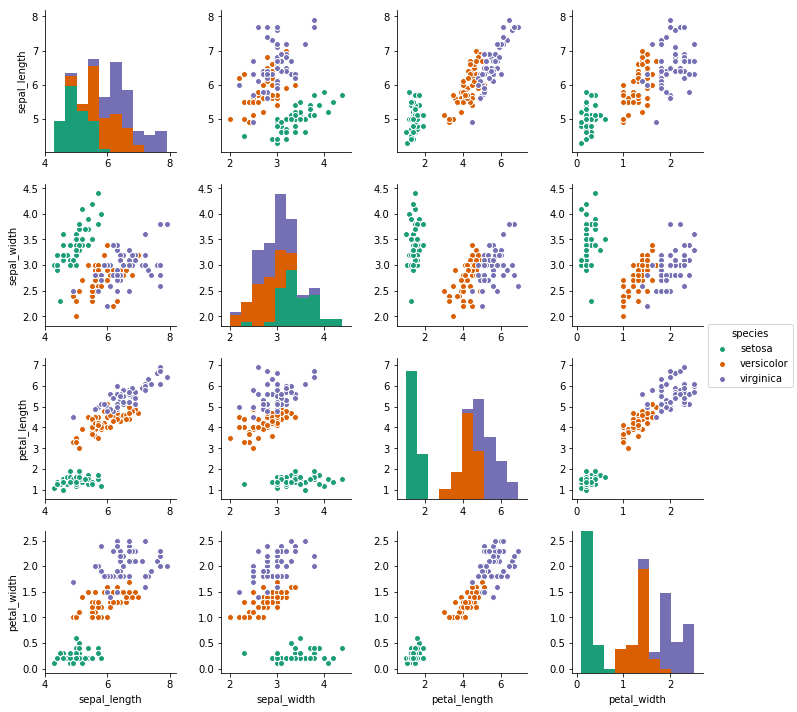

In [4]:
sns.pairplot(iris_df,hue='species',palette='Dark2')

Text(0,0.5,'Probability Density')

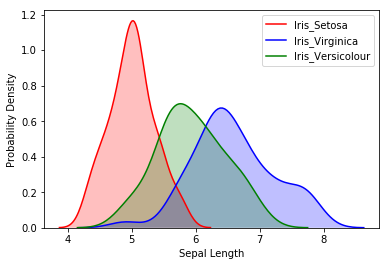

In [5]:
# Plotting the KDE Plot 
sns.kdeplot(iris_df.loc[(iris_df['species']=='setosa'), 
            'sepal_length'], color='r', shade=True, Label='Iris_Setosa')

sns.kdeplot(iris_df.loc[(iris_df['species']=='virginica'), 
            'sepal_length'], color='b', shade=True, Label='Iris_Virginica')  
  
sns.kdeplot(iris_df.loc[(iris_df['species']=='versicolor'), 
            'sepal_length'], color='g', shade=True, Label='Iris_Versicolour') 
      
    
# Setting the X and Y Label
plt.xlabel('Sepal Length') 
plt.ylabel('Probability Density') 

## Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = iris_df.drop('species',axis=1)
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

## Training

In [8]:
from sklearn.svm import SVC

In [9]:
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Testing

In [10]:
preds = model.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef

In [50]:
cm = np.array(confusion_matrix(y_test, preds))
confusion = pd.DataFrame(cm, index=['is_setosa', 'is_virginica', 'is_versicolor'], 
                        columns=['predicted_setosa', 'predicted_virginica', 'predicted_versicolor'])
confusion

,predicted_setosa,predicted_virginica,predicted_versicolor
is_setosa,10,0,0
is_virginica,0,12,0
is_versicolor,0,0,8


In [13]:
print(classification_report(y_test,preds))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      1.00      1.00        12
  virginica       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        30



In [14]:
matthews_corrcoef(y_test,preds)

1.0

## Further insights using 
### PCA (Principal component Analysis)

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)

In [17]:
print("Shape of feature set before {}".format(X_train.shape))
print("Shape of feature set after {}".format(pca_2d.shape))

Shape of feature set before (120, 4)
Shape of feature set after (120, 2)


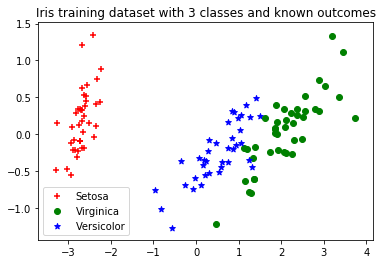

In [18]:
import pylab as pl
i = 0
for iris_cl in y_train.values:
    if iris_cl == 'setosa':
        c1 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c='r', marker='+')
    elif iris_cl == 'virginica':
        c2 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c='g', marker='o')
    elif iris_cl == 'versicolor':
        c3 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c='b', marker='*')
    i+=1
pl.legend([c1, c2, c3], ['Setosa', 'Virginica', 'Versicolor'])
pl.title('Iris training dataset with 3 classes and known outcomes')
pl.show()

In [19]:
print("Setosa : {}".format(sum(y_train=='setosa')))
print("Virginica : {}".format(sum(y_train=='virginica')))
print("Versicolor : {}".format(sum(y_train=='versicolor')))

Setosa : 40
Virginica : 42
Versicolor : 38


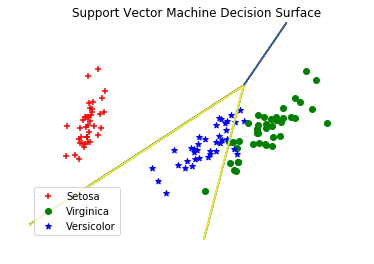

In [42]:
from sklearn import svm
svmClassifier_2d = svm.LinearSVC(random_state=111).fit(pca_2d, y_train)
i = 0
for iris_cl in y_train.values:
    if iris_cl == 'setosa':
        c1 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c='r', marker='+')
    elif iris_cl == 'virginica':
        c2 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c='g', marker='o')
    elif iris_cl == 'versicolor':
        c3 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c='b', marker='*')
    i+=1
pl.legend([c1, c2, c3], ['Setosa', 'Virginica', 'Versicolor'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))
Z = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
Z_mapped = np.zeros([Z.shape[0], Z.shape[1]])
for r in range(len(Z)):
    for c in range(len(Z[r])):
        if Z[r][c] == 'setosa':
            Z_mapped[r][c] = 0
        if Z[r][c] == 'virginica':
            Z_mapped[r][c] = 1
        if Z[r][c] == 'versicolor':
            Z_mapped[r][c] = 2
# print("Z : {}".format(Z))
# print("Z_mapped : {}".format(Z_mapped))
pl.contour(xx, yy, Z_mapped)
pl.title('Support Vector Machine Decision Surface')
pl.axis('off')
plt.show()